In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv('employee_attrition.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Shape: (1470, 35)

First 5 rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction 

Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

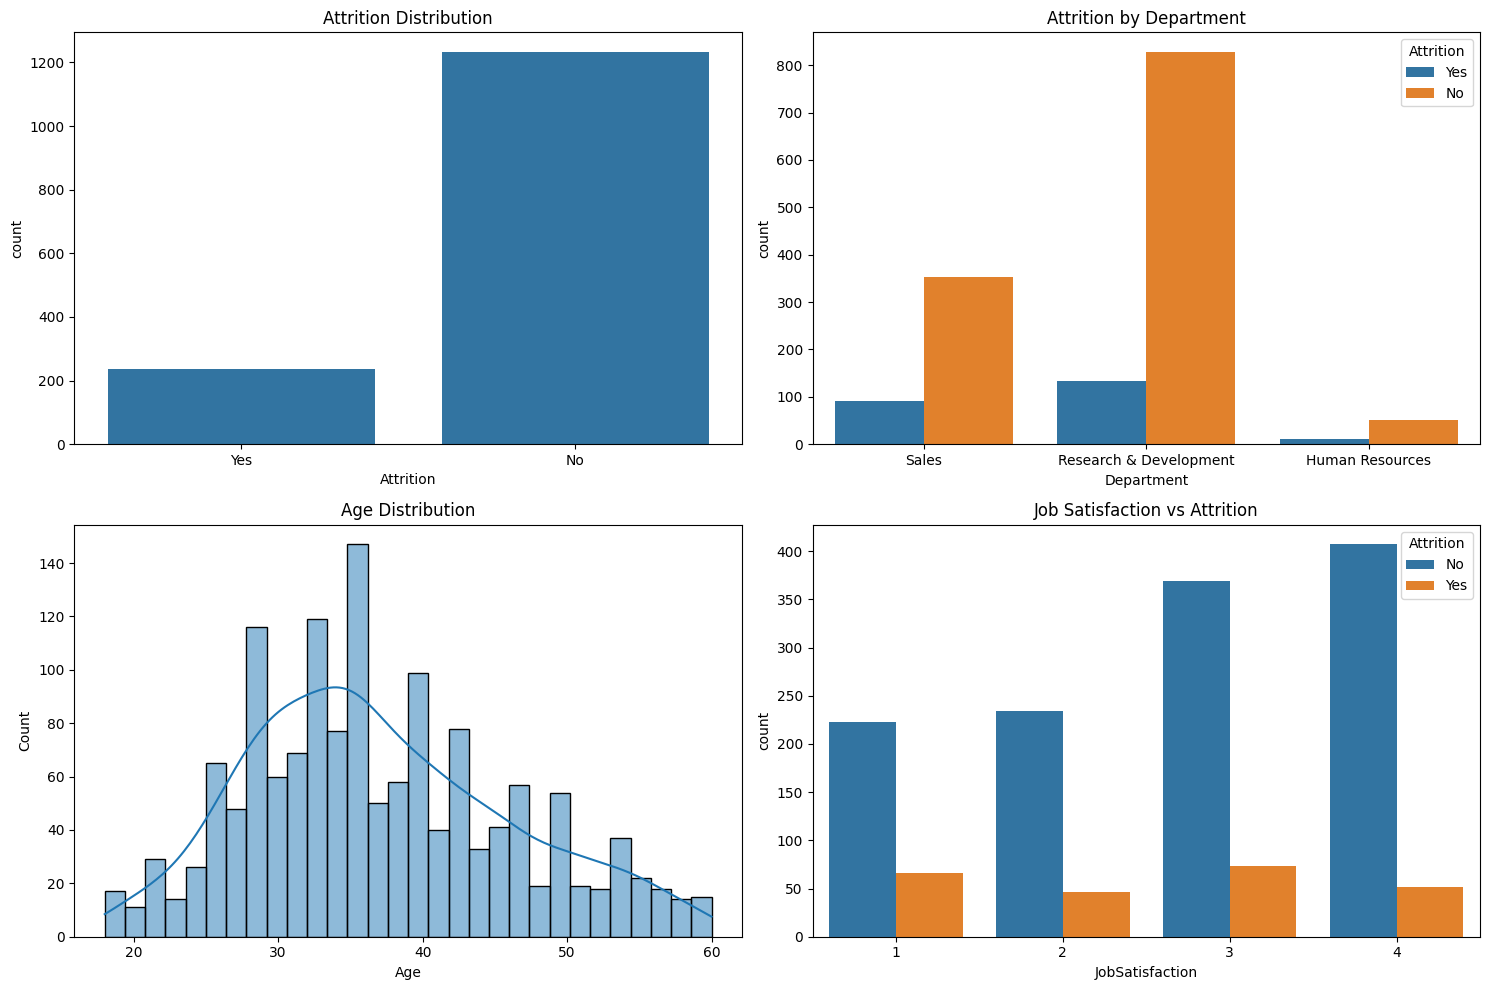

In [ ]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Check duplicates
print("\nDuplicate Records:", df.duplicated().sum())

# Target variable distribution
print("\nAttrition Distribution:\n", df['Attrition'].value_counts())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

# Visualizations
plt.figure(figsize=(15, 10))

# 1. Attrition count plot
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Distribution')

# 2. Attrition vs Department
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')

# 3. Age distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')

# 4. JobSatisfaction vs Attrition
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title('Job Satisfaction vs Attrition')

plt.tight_layout()
plt.show()

In [ ]:
# Convert target to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features (drop unnecessary columns like EmployeeNumber, etc.)
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.891156462585034

Confusion Matrix:
 [[249   6]
 [ 26  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

